In [9]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [15]:
import cv2
import matplotlib.pyplot as plt

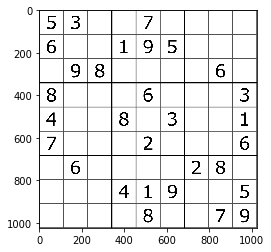

In [381]:
img  = cv2.imread("C:/Users/prath/Downloads/Sudoku.png")
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

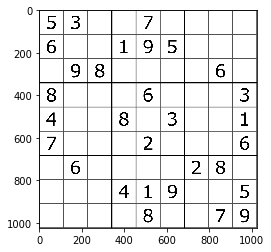

In [383]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

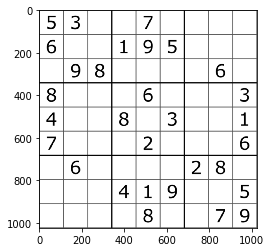

In [384]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

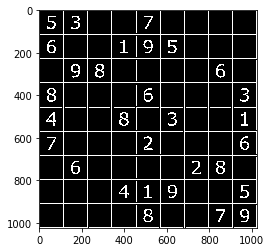

In [403]:
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

1046529.0 0


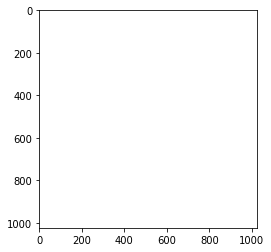

In [412]:
import numpy as np

contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
c = 0
for i in contours:
        area = cv2.contourArea(i)
        #print(area)
        if area > 1000 :
                if area > max_area:
                    max_area = area
                    best_cnt = i
                    cntr_ind = c
        c+=1
print(max_area, cntr_ind)

img = cv2.imread("C:/Users/prath/Downloads/Sudoku.png")

image = cv2.drawContours(img, contours, cntr_ind, (0, 255, 0), 3)
mask = np.zeros((gray.shape),np.uint8)
cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

[[ 1  3  7 ...  7  3  1]
 [ 3  8 18 ... 19  8  3]
 [ 7 18 43 ... 49 20  7]
 ...
 [ 7 19 49 ... 62 24  8]
 [ 3  8 20 ... 24 10  3]
 [ 1  3  8 ...  8  3  1]]
133
1046529.0
12038.0
732.5
12039.0
2222.0
568.0
428.5
12037.0
12153.0
1754.5
641.0
11930.0
11927.5
11926.5
12020.0
12246.5
11916.5
11814.5
11811.0
1753.5
629.0
11916.0
718.5
11805.5
1313.0
369.5
11902.0
11921.0
12039.0
1027.0
12126.0
11814.5
2228.0
567.0
429.5
11701.5
941.0
11702.5
11816.0
11702.5
11793.0
11819.0
1757.0
636.0
11930.0
12020.5
11811.0
11702.5
11703.5
11816.0
964.5
11705.0
11795.0
11817.0
11927.5
1760.5
631.5
12019.5
732.5
11916.0
11920.5
11925.0
12040.0
716.5
11816.0
11816.0
952.5
11809.5
2230.0
565.5
423.5
11907.5
12129.0
1308.5
373.5
11926.5
943.5
11805.5
11702.5
11705.0
11809.5
1749.5
634.5
11703.5
11792.0
11808.0
12016.0
2238.5
569.0
425.5
11902.0
1752.5
635.5
11907.5
11907.0
1758.5
634.5
12021.0
11793.0
11795.0
11792.0
11889.0
2228.5
566.5
423.5
12112.5
11921.0
11819.0
11817.0
1033.5
11925.0
1750.5
637.0
11808.0

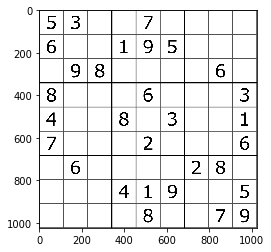

In [415]:
import os
from imutils import contours
#os.mkdir('C:/Users/prath/Downloads/square')
mask = np.zeros((gray.shape),np.uint8)
cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)

out = np.zeros_like(gray)
out[mask == 255] = gray[mask == 255]



blur = cv2.GaussianBlur(out, (5,5), 0)

print(blur)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
thresh = cv2.adaptiveThreshold(blur, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21,10)
#plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
contour, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contour))


image = cv2.imread("C:/Users/prath/Downloads/Sudoku.png")

c = 0
sqr_num=0
contours_req = []
for (i, c) in enumerate(contour, 1):
        area = cv2.contourArea(c)
        print(area)
        if area >10000 and area <13000:
            contours_req.append(c)
            #cv2.drawContours(image, contour, i, (0, 255, 0), 3)
            

            

            
(cnts, _) = contours.sort_contours(contours_req, method="top-to-bottom")
sudoku_rows = []
row = []
for (i, c) in enumerate(cnts, 1):
        row.append(c)
        if i % 9 == 0:  
            (cnts, _) = contours.sort_contours(row, method="left-to-right")
            sudoku_rows.append(cnts)
            row = []

for row in sudoku_rows:
    for c in row:
        x, y, width, height = cv2.boundingRect(c)
        sqr = image[y+3:y+height-3, x+3:x+width-3]
        sqr_num+=1
        cv2.imwrite("C:/Users/prath/Downloads/square/sqr_"+str(sqr_num)+".png", sqr)
            # cv2.drawContours(image, contours, c, (0, 255, 0), 3)


In [115]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25862 sha256=4154ce0d1af7b05781174c634a85ab89ba3140363035dcbea15ffdabda3e74aa
  Stored in directory: c:\users\prath\appdata\local\pip\cache\wheels\86\d7\0a\4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install  tesseract

  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562577 sha256=d66338eee6482bb85252256b1ba130cae90befbb05985be2302e809135eb48ba
  Stored in directory: c:\users\prath\appdata\local\pip\cache\wheels\01\3f\af\2f732560b9c4e51dd131bcbc6b7466a3124d15ab3fd393f85a
Successfully built tesseract
Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14066 sha256=55837902ad4bb9e2eb4333f264010279781f25656d10455e05546bd0ab7d42c7
  Stored in directory: c:\users\prath\appdata\local\pip\cache\wheels\a4\89\b9\3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
Note: you may need to restart the kernel to use updated packages.


In [70]:
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [204]:
sudoku_grid=[]
row =[]
for i in range(1,82):
    img = cv2.imread("C:/Users/prath/Downloads/square/sqr_"+str(i)+".png")
    ret,img = cv2.threshold(np.array(img), 100, 255, cv2.THRESH_BINARY)
    img_fin = Image.fromarray(img.astype(np.uint8))
    text = pytesseract.image_to_string(img_fin,config='--psm 13 -c tessedit_char_whitelist=0123456789')
    row.append(int(text.strip()) if text.strip()>='1' and text.strip() <='9' else 0)
    if i % 9 == 0:  
        sudoku_grid.append(row)
        row = []
    
print(sudoku_grid)

[[5, 3, 0, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, 9, 8, 0, 0, 0, 0, 6, 0], [8, 0, 0, 0, 6, 0, 0, 0, 3], [4, 0, 0, 8, 0, 3, 0, 0, 1], [7, 0, 0, 0, 2, 0, 0, 0, 6], [0, 6, 0, 0, 0, 0, 2, 8, 0], [0, 0, 0, 4, 1, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 7, 9]]


In [205]:
from sudoku import Sudoku



puzzle = Sudoku(3, 3, board=sudoku_grid)
print(puzzle)



---------------------------
9x9 (3x3) SUDOKU PUZZLE
Difficulty: 0.63
---------------------------
+-------+-------+-------+
| 5 3   |   7   |       |
| 6     | 1 9 5 |       |
|   9 8 |       |   6   |
+-------+-------+-------+
| 8     |   6   |     3 |
| 4     | 8   3 |     1 |
| 7     |   2   |     6 |
+-------+-------+-------+
|   6   |       | 2 8   |
|       | 4 1 9 |     5 |
|       |   8   |   7 9 |
+-------+-------+-------+

        


In [206]:
puzzle.solve().show_full()


---------------------------
9x9 (3x3) SUDOKU PUZZLE
Difficulty: SOLVED
---------------------------
+-------+-------+-------+
| 5 3 4 | 6 7 8 | 9 1 2 |
| 6 7 2 | 1 9 5 | 3 4 8 |
| 1 9 8 | 3 4 2 | 5 6 7 |
+-------+-------+-------+
| 8 5 9 | 7 6 1 | 4 2 3 |
| 4 2 6 | 8 5 3 | 7 9 1 |
| 7 1 3 | 9 2 4 | 8 5 6 |
+-------+-------+-------+
| 9 6 1 | 5 3 7 | 2 8 4 |
| 2 8 7 | 4 1 9 | 6 3 5 |
| 3 4 5 | 2 8 6 | 1 7 9 |
+-------+-------+-------+

        
